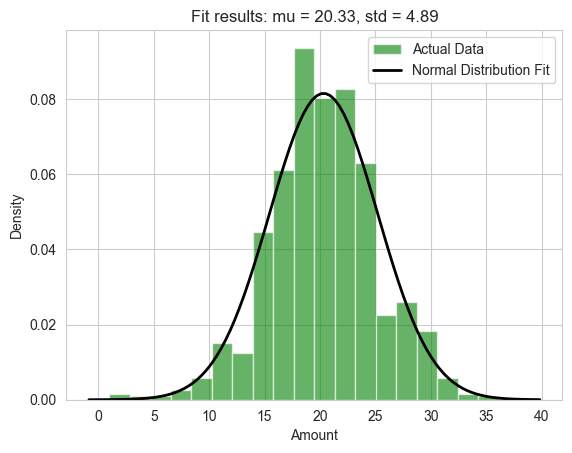

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

"""Looking for the best type of distribution to use for interarrival times to the discreet event model"""

"""select amount, count(*) instances from (
SELECT count(*) amount
  FROM [NHSE_Sandbox_DCNorth].[Main].[SUS_APC_Spells_Vw] 
  where left( [Core_HRG_Desc],3) in ('NZ3','NZ4','NZ5')
		and der_provider_code = 'REP'
group by Admission_Date) b
group by amount
order by count(*) desc"""

file_path = '../REP_Distribution.csv'
data_df = pd.read_csv(file_path)

# Display the first few rows
data_df.head()

# Create a sample from the given counts and occurrences
sample = []
for amount, instance in zip(data_df['amount'], data_df['instances']):
    sample.extend([amount] * instance)

# Convert to a NumPy array for further analysis
sample = np.array(sample)

# Fit a normal distribution to the sample
mu, std = norm.fit(sample)

# Parameters for the normal distribution
mu, std

# Set the style for the plot
sns.set_style('whitegrid')

# Plot the histogram of the sample
plt.hist(sample, bins=20, density=True, alpha=0.6, color='g', label="Actual Data")

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution Fit")

title = f"Fit results: mu = {mu:.2f}, std = {std:.2f}"
plt.title(title)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


